# **Exercici d’avaluació continuada**: Estudi de les interferències per doble escletxa de Young


<div style="margin-top: 1.5cm;"></div>

En un muntatge de doble escletxa de Young il·luminat amb llum monocromàtica de longitud d'ona $\lambda=(600+$2 últims dígits del vostre niub$)$ nm, intensitat $I_0=1$ (per S1 i S2) i separació entre escletxes $d=1$ mm, s'observen franges d'interferència a una distància $D=10$ m.


<div style="margin-top: 1cm;"></div>

**Nota 1:** Per simular les franges d'interferència podeu fer ús de la funció meshgrid que us permet assignar (bidimensional) valors a la intensitat resultant. La funció mesgrid(x,y) retorna les coordenades de quadrícula 2D basades en les coordenades que contenen els vectors x i y. On X corresponta a una matriu en què cada fila és una còpia de x, mentre que Y és una matriu en què cada columna és una còpia de y. La quadrícula que representen les coordenades X i Y té length(y) files i length(x) columnes. Podeu trobar una bona documentació d'aquesta funció a [documentació meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

<div style="margin-top: 0.5cm;"></div>

**Nota 2** Per tal que la simulació numèrica de la intensitat tingui suficient resolució espaial i a la vegada sigui el més ràpida possible podeu assignar al vector $x$ i $y$ una resolució de $\delta x= 10$ $\mu$m i $\delta y= 10$ mm.

<div style="margin-top: 0.5cm;"></div>

**Nota 3:** Per representar bidimensionalment la intensitat sobre la pantalla podeu utilitzar la funció imshow. Per fixar l'escala de color de la imatge tal i com s'indica a cada un dels apartats de l'exercici ho heu de fer controlant els paràmetres vmin i vmax. 


In [1]:
# importació de llibreries

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

**i)** Representa gràficament les franges d'interferència observades sobre una pantalla de dimensions $x\times y = 20\times 4$ cm. Comprova que la interfranja es correspon amb el valor teòric $\Delta x = \frac{\lambda D}{d}$. Fixeu el màxim i mínim de la imatge entre $0$ i $4I_0$.

In [2]:
# i) Definició de variables 

lambd = 600e-9; # longitud d'ona
k=2*np.pi/lambd; # vector d'ones

d=1e-3; # separació entre escletxes
D=1e1;  # distància a la pantalla


# Dimensions pantalla
limx=1e-1;
limy=2e-2;

# ressolució
resx=1e-5;
resy=1e-2;

numx=int(2*limx/resx+1)
numy=int(2*(limy/resy)+1)

x = np.linspace(-limx,limx,numx)
y = np.linspace(-limy,limy,numy)

# Meshgrid
[X,Y]=np.meshgrid(x,y);

In [3]:
# i) Càlcul camí òptic, interfranja i intensitat

R2=np.sqrt((X+d/2)**2+Y**2+D**2); # Camí geomètric des d'S2
R1=np.sqrt((X-d/2)**2+Y**2+D**2); # Camí geomètric des d'S1

DR=R2-R1; # diferència de camíns geomètrica
delta_grid=k*DR; # diferència de camíns òptics


I_grid=4*np.cos(delta_grid/2)**2; # Intensitat total

Dx=lambd*D/d; # Interfranja teòrica

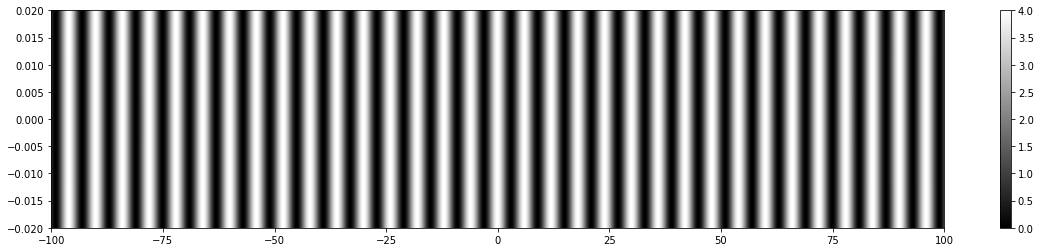

In [4]:
# i) Distribució d'intensitat sobre la pantalla

plt.figure(figsize = (20,4))
fig = plt.imshow(I_grid,
                 vmin = 0, vmax = 4,
                 extent = [X.min()*1e3, X.max()*1e3, Y.min(), Y.max()],
                 interpolation ='nearest', origin ='lower',
                 cmap = 'gray',
                 aspect = 'auto')
plt.colorbar(fig)
plt.show(fig)

**ii)** Desplaça la font puntual S (que il·lumina la doble escletxa i que està situada a una distància $a=2$ m) una distància $x'=0.5$ mm. Representa gràficament el patró d'interferències sobre l'eix x. Comprova que les franges s'han desplaçat com $\Delta x_0 = -\frac{x'D}{a}$.

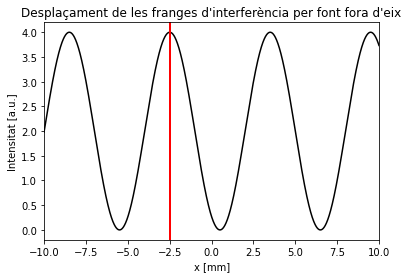

<IPython.core.display.Math object>

In [5]:
a = 2e0 # distància font a doble escletxa
d_font = 0.5e-3 # desplaçament font

Dx0=-d_font*D/a

DR_font_0 = DR + (np.sqrt((d_font + d/2)**2 + Y**2 + a**2) - np.sqrt((d_font - d/2)**2 + Y**2 + a**2))
delta_grid_font_0 = k * DR_font_0
I_grid_font_0 = 4 * np.cos(delta_grid_font_0 / 2)**2

plt.figure(2)
plt.plot(X[0, :]*1e3, I_grid_font_0[0, :], color='k')
plt.xlim([-10, 10])
plt.ylim([-0.2, 4.2])
plt.plot([Dx0*1e3,Dx0*1e3], [-0.2,4.2],color = 'r', linewidth = 2)

plt.title("Desplaçament de les franges d'interferència per font fora d'eix")
plt.xlabel("x [mm]")
plt.ylabel("Intensitat [a.u.]")
         
plt.show()

display(Math(f"\\Delta x_0 = {Dx0}"))


**iii)** Considera que il·lumines la doble escletxa amb una font extensa (rectangular i d'amplada $0.5$ mm). Representa gràficament les franges d'interferència i calcula el contrast. Nota que per modelar la font extensa es pot considerar que aquesta està composta per $N=(10+$ últim dígit del vostre niub$)$ fonts puntuals incoherents distribuïdes al llarg de la font. Fixeu el màxim i mínim de la imatge entre $0$ i $4NI_0$.

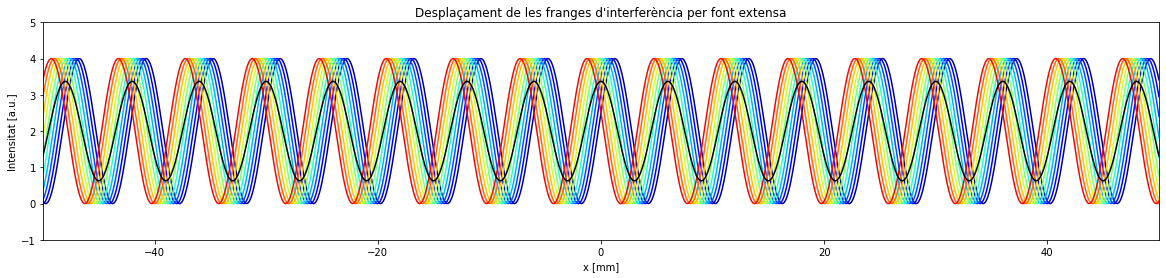

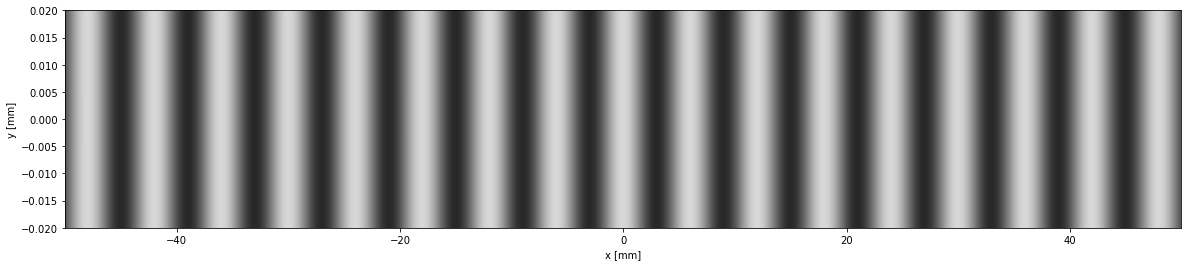

Contrast (V): 0.685


In [8]:
N = 10

X_font = np.linspace(-d_font/2, d_font/2, N)
I_inc = 0
colors = plt.cm.jet(np.linspace(0, 1, N+1))

for i, x_font_i in enumerate(X_font):
    DR_font = DR + (np.sqrt((x_font_i + d/2)**2 + Y**2 + a**2) - np.sqrt((x_font_i - d/2)**2 + Y**2 + a**2))
    delta_grid_font = k * DR_font
    I_grid_font = 4 * np.cos(delta_grid_font / 2)**2
    I_inc += I_grid_font
    
    plt.figure(2,figsize = (20,4))
    plt.plot(X[0, :]*1e3, I_grid_font[0, :], color=colors[i])
    plt.ylim([-1, 5])

plt.figure(2,figsize = (20,4))
plt.plot(X[0, :]*1e3, I_inc[0, :] / N, color='k')
plt.xlim([-50, 50])

plt.title("Desplaçament de les franges d'interferència per font extensa")
plt.xlabel("x [mm]")
plt.ylabel("Intensitat [a.u.]")

plt.show()

plt.figure(figsize = (20,4))
fig = plt.imshow(I_inc,
                 vmin = 0, vmax = 40,
                 extent = [X.min()*1e3, X.max()*1e3, Y.min(), Y.max()],
                 interpolation ='nearest', origin ='lower',
                 cmap = 'gray',
                 aspect = 'auto')

plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.xlim([-50, 50])

plt.show()

Imax = np.max(I_inc)
Imin = np.min(I_inc)
V = (Imax - Imin) / (Imax + Imin)
print("Contrast (V):", "%.3f" % V)

**iv)** Finalment, apropa la pantalla a una distància $D=1$ m i torna a utilitzar una font puntual centrada a l'eix òptic. Representa gràficament les franges d'interferència sobre una pantalla de dimensions $0.04\times 4$ m. Es continuen observant franges verticals? Raona la teva resposta.

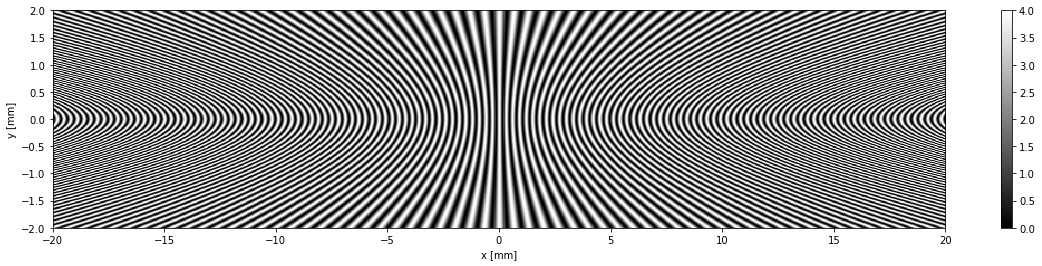

In [9]:
D_c = 1
Dx_c = lambd * D_c / d

limx_c = 4e-2
limy_c = 4

resx_c = 1e-4
resy_c = 1e-2

x_c = np.arange(-limx_c, limx_c + resx_c, resx_c)
y_c = np.arange(-limy_c, limy_c + resy_c, resy_c)

X_c, Y_c = np.meshgrid(x_c, y_c)

R2_c = np.sqrt((X_c + d/2)**2 + Y_c**2 + D_c**2)
R1_c = np.sqrt((X_c - d/2)**2 + Y_c**2 + D_c**2)

DR_c = R2_c - R1_c
delta_grid_c = k * DR_c
I_grid_c = 4 * np.cos(delta_grid_c / 2)**2

plt.figure(figsize = (20,4))
plt.imshow(I_grid_c,
                 vmin = 0, vmax = 4,
                 extent = [-20, 20, Y_c.min(), Y_c.max()],
                 interpolation ='nearest', origin ='lower',
                 cmap = 'gray',
                 aspect = 'auto')
plt.colorbar()
plt.ylim([-2, 2])
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")

plt.show()